In [118]:
#Importing Libraries
import numpy as np # numpy
import pandas as pd # pandas
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [119]:
#Load datset into dataframe
train = pd.read_csv('../input/train.csv') 

In [120]:
# to know the dataframe
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [121]:
#Data Preprocessing

In [122]:
train.shape

(891, 12)

In [123]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [124]:
train.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [125]:
#Replace NA values in Age
train["Age"] = train["Age"].fillna(np.mean(train["Age"]))
print(train["Cabin"].isna().sum())
print(train["Embarked"].isna().sum())

687
2


In [126]:
#Omit cabin column because most of the rows has no value
data = train.drop('Cabin',axis=1)
#Omit rows with Embarked as na
data.dropna(subset=['Embarked'],inplace=True)

In [127]:
#Omit irrelevant columns - Name
data=data.drop('Name',axis=1)
#Omit irrelevant columns - PassengerId
data=data.drop('PassengerId',axis=1)
#omit irrelevant columns -Sibsp,Ticket and Parch
data=data.drop("Ticket",axis=1)
data = data.drop("SibSp",axis=1)
data = data.drop("Parch",axis=1)
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [128]:
#Exploratory Data Analysis
#Numerical Columns Analysis
data.describe()

,Survived,Pclass,Age,Fare
count,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.653446,32.096681
std,0.486260,0.834700,12.968366,49.697504
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,22.000000,7.895800
50%,0.000000,3.000000,29.699118,14.454200
75%,1.000000,3.000000,35.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


In [129]:
#Categorical Analysis
data.groupby(['Pclass','Survived','Sex']).count()

Age  Fare  Embarked
Pclass Survived Sex                        
1      0        female    3     3         3
                male     77    77        77
       1        female   89    89        89
                male     45    45        45
2      0        female    6     6         6
                male     91    91        91
       1        female   70    70        70
                male     17    17        17
3      0        female   72    72        72
                male    300   300       300
       1        female   72    72        72
                male     47    47        47

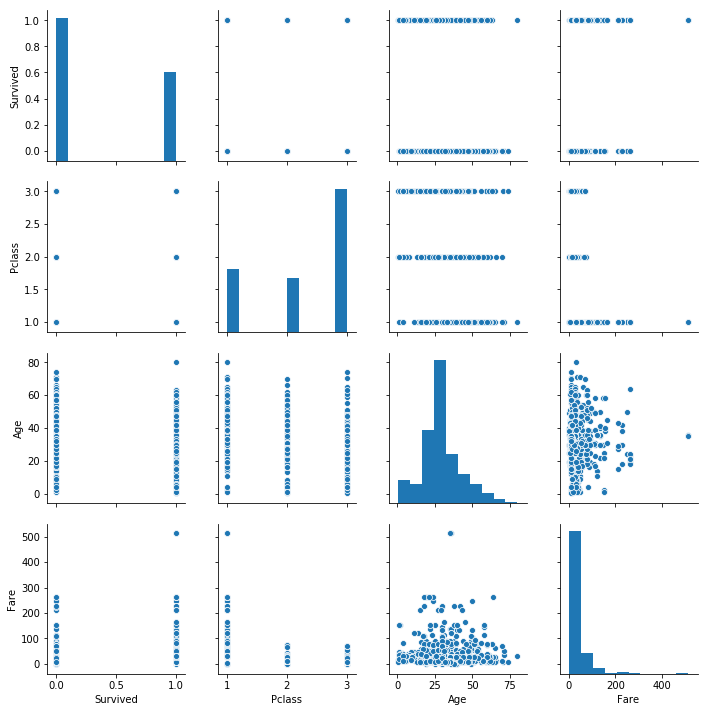

In [130]:
sns.pairplot(data)

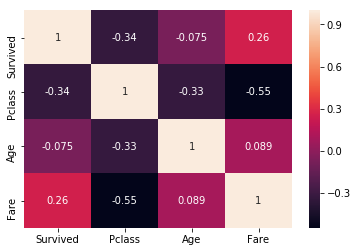

In [131]:
sns.heatmap(data.corr(),annot=True)


In [132]:
#Insights
 #Age and Fare has high impact on survival

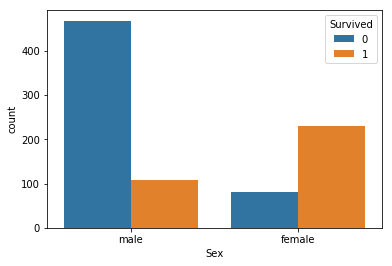

In [133]:
sns.countplot(x='Sex',data=data,hue='Survived')

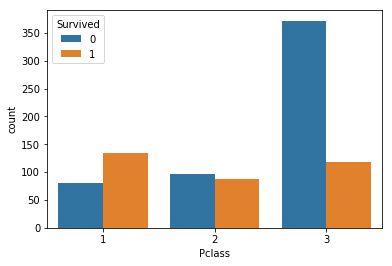

In [134]:
sns.countplot(x='Pclass',data=data,hue='Survived')

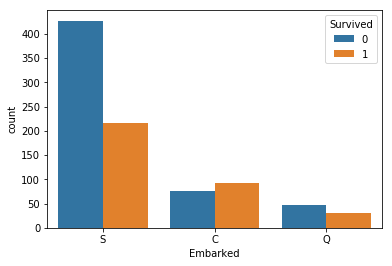

In [135]:
sns.countplot(x='Embarked',data=data,hue='Survived')

In [136]:
#Encode Sex
from sklearn.preprocessing import LabelEncoder
Sex_e= LabelEncoder()
data['Sex_e']=Sex_e.fit_transform(data['Sex'])
data= data.drop('Sex',axis=1)
Embarked_e=LabelEncoder()
data['Embarked_e']=Embarked_e.fit_transform(data['Embarked'])
data=data.drop('Embarked',axis=1)
#Datasets to build model
X=data.drop('Survived',axis=1)
Y=data['Survived']

In [137]:
#Split the training dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [138]:
#Train the model
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [139]:
#Test the model
Y_pred=dt.predict(X_test)

In [140]:
#Evaluate the model-Confusion matrix and Accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))

[[81 28]
 [15 54]]
0.7584269662921348
